<a href="https://colab.research.google.com/github/Kirtiwardhan01/ML-Hackathon-/blob/master/Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Importing the packages and dataset

import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Exploring the dataset

train_df = pd.read_csv('/content/drive/My Drive/Hackathon/Employee_attrition/Train.csv')   #(7000, 24) 
target = train_df['Attrition_rate']
train_df.drop(['Attrition_rate'],1,inplace=True)

test_df = pd.read_csv('/content/drive/My Drive/Hackathon/Employee_attrition/Test.csv')     #(3000, 23)

dataset = pd.concat([train_df, test_df], axis=0, sort=False)


print(dataset.shape)

dataset.head()

(10000, 23)


,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2


In [ ]:
#Let's see the details of the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                10000 non-null  object 
 1   Gender                     10000 non-null  object 
 2   Age                        9427 non-null   float64
 3   Education_Level            10000 non-null  int64  
 4   Relationship_Status        10000 non-null  object 
 5   Hometown                   10000 non-null  object 
 6   Unit                       10000 non-null  object 
 7   Decision_skill_possess     10000 non-null  object 
 8   Time_of_service            9804 non-null   float64
 9   Time_since_promotion       10000 non-null  int64  
 10  growth_rate                10000 non-null  int64  
 11  Travel_Rate                10000 non-null  int64  
 12  Post_Level                 10000 non-null  int64  
 13  Pay_Scale                  9988 non-null   floa

In [ ]:
dataset_missing = dataset.isnull().sum().sort_values(ascending=False)
dataset_missing = pd.DataFrame(dataset_missing).reset_index()
dataset_missing.columns = ['Feature', 'Number of Data Records Missing']
dataset_missing.head(10)


,Feature,Number of Data Records Missing
0,VAR4,954
1,VAR2,794
2,Age,573
3,Time_of_service,196
4,Work_Life_balance,16
5,Pay_Scale,12
6,VAR7,0
7,Gender,0
8,Education_Level,0
9,Relationship_Status,0


In [ ]:
#Checking the percentage of missing values
dataset_missingpercent = 100 * (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
print(dataset_missingpercent)

VAR4                         9.54
VAR2                         7.94
Age                          5.73
Time_of_service              1.96
Work_Life_balance            0.16
Pay_Scale                    0.12
VAR7                         0.00
Gender                       0.00
Education_Level              0.00
Relationship_Status          0.00
Hometown                     0.00
Unit                         0.00
Decision_skill_possess       0.00
Travel_Rate                  0.00
Time_since_promotion         0.00
growth_rate                  0.00
VAR6                         0.00
Post_Level                   0.00
Compensation_and_Benefits    0.00
VAR1                         0.00
VAR3                         0.00
VAR5                         0.00
Employee_ID                  0.00
dtype: float64


In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,9427.0,39.675507,13.574856,19.0000,27.0000,38.0000,52.0000,65.0000
Education_Level,10000.0,3.199400,1.065436,1.0000,3.0000,3.0000,4.0000,5.0000
Time_of_service,9804.0,13.390657,10.311381,0.0000,5.0000,10.0000,21.0000,43.0000
Time_since_promotion,10000.0,2.378600,1.149780,0.0000,1.0000,2.0000,3.0000,4.0000
growth_rate,10000.0,47.008400,15.848553,20.0000,33.0000,47.0000,61.0000,74.0000
Travel_Rate,10000.0,0.820700,0.646524,0.0000,0.0000,1.0000,1.0000,2.0000
Post_Level,10000.0,2.797000,1.171037,1.0000,2.0000,3.0000,4.0000,5.0000
Pay_Scale,9988.0,6.022627,2.070087,1.0000,5.0000,6.0000,8.0000,10.0000
Work_Life_balance,9984.0,2.385817,1.128782,1.0000,1.0000,2.0000,3.0000,5.0000
VAR1,10000.0,3.089100,0.831884,1.0000,3.0000,3.0000,3.0000,5.0000


In [ ]:
#Filling-in the blank values in 'Age' column by grouping genderwise and accordingly transforming the column
dataset['Age'] = dataset.groupby('Gender')['Age'].transform(lambda x: x.fillna(x.mean()))
dataset['Age'].mean()

39.67543190349851

In [ ]:
dataset['Time_of_service'] = dataset.groupby('Unit')['Time_of_service'].transform(lambda x: x.fillna(x.mean()))
dataset['Time_of_service'].mean()

13.391590185370655

In [ ]:
dataset['Pay_Scale'] = dataset.groupby('Post_Level')['Pay_Scale'].transform(lambda x: x.fillna(x.mean()))
dataset['Pay_Scale'].mean()

6.022635900792347

In [ ]:
dataset['VAR2'] = dataset['VAR2'].fillna(dataset['VAR2'].mean())
print(dataset['VAR2'].mean())

dataset['VAR4'] = dataset['VAR4'].fillna(dataset['VAR4'].mean())
print(dataset['VAR4'].mean())

dataset['Work_Life_balance'] = dataset['Work_Life_balance'].fillna(dataset['Work_Life_balance'].mean())
print(dataset['Work_Life_balance'].mean())


0.0026529002824258116
1.8959761220429063
2.385817307692307


The describe method is used to find the summary statistics for every column

Now that the data is all cleaned and free of NaN values, we can start the with plots and Exploratory Analysis

In [ ]:
dataset.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.000000,4,5,3
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.000000,3,5,3
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.000000,3,8,3
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,1.895976,3,7,3
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.000000,2,8,2




For model building with Sci-kit learn we need to have the variables as numerical values.

However,we have few variables with the text columns. We are going to dummify these categorical columns before building network on it.

In [ ]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in columns below. 
dataset['Compensation_and_Benefits']= label_encoder.fit_transform(dataset['Compensation_and_Benefits']) 
dataset['Decision_skill_possess']= label_encoder.fit_transform(dataset['Decision_skill_possess']) 
dataset['Unit']= label_encoder.fit_transform(dataset['Unit'])

dataset[['Compensation_and_Benefits','Decision_skill_possess','Unit']] = dataset[['Compensation_and_Benefits','Decision_skill_possess','Unit']].astype(object)

print(dataset['Compensation_and_Benefits'].value_counts())
print(dataset['Decision_skill_possess'].value_counts())
print(dataset['Unit'].value_counts())


2    5686
3    3346
4     490
0     280
1     198
Name: Compensation_and_Benefits, dtype: int64
1    2535
0    2501
3    2488
2    2476
Name: Decision_skill_possess, dtype: int64
2     1963
3     1648
10    1389
5     1008
9      991
7      714
0      679
1      513
4      319
6      292
8      290
11     194
Name: Unit, dtype: int64


In [ ]:
# All the categorical columns

var_mod = ['Gender','Relationship_Status']

# Dataframe of all the categorical columns

categorical_cols=dataset[var_mod]
categorical_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               10000 non-null  object
 1   Relationship_Status  10000 non-null  object
dtypes: object(2)
memory usage: 234.4+ KB


In the next step, we will dummify the categorical columns. We will also drop the first column of all the dummied categories.

In [ ]:
dummy_encoded_dataset = pd.get_dummies(categorical_cols,drop_first=True)
print(dummy_encoded_dataset.shape)
print(dummy_encoded_dataset.columns)

(10000, 2)
Index(['Gender_M', 'Relationship_Status_Single'], dtype='object')


In [ ]:
#Let's check the shape of df_train before merging it with dummy_encoded_df_train
dataset.shape

(10000, 23)

In [ ]:
#Let's merge dummy_encoded_df_train with df_train

dataset2 = pd.concat([dataset,dummy_encoded_dataset],1)
dataset2.shape

(10000, 25)



You can see that the number of columns have increased from 23 to 25 after one hot encoding.

Let's drop the categorical columns now, as we have their dummified columns as well.

In [ ]:
drop_categorical_cols = dataset[var_mod]

#Let's drop var_mod from onehot_encoded_dataset
dataset2.drop(drop_categorical_cols,1,inplace=True)

#dataset2 is our new dataframe
print(dataset2.shape)

(10000, 23)


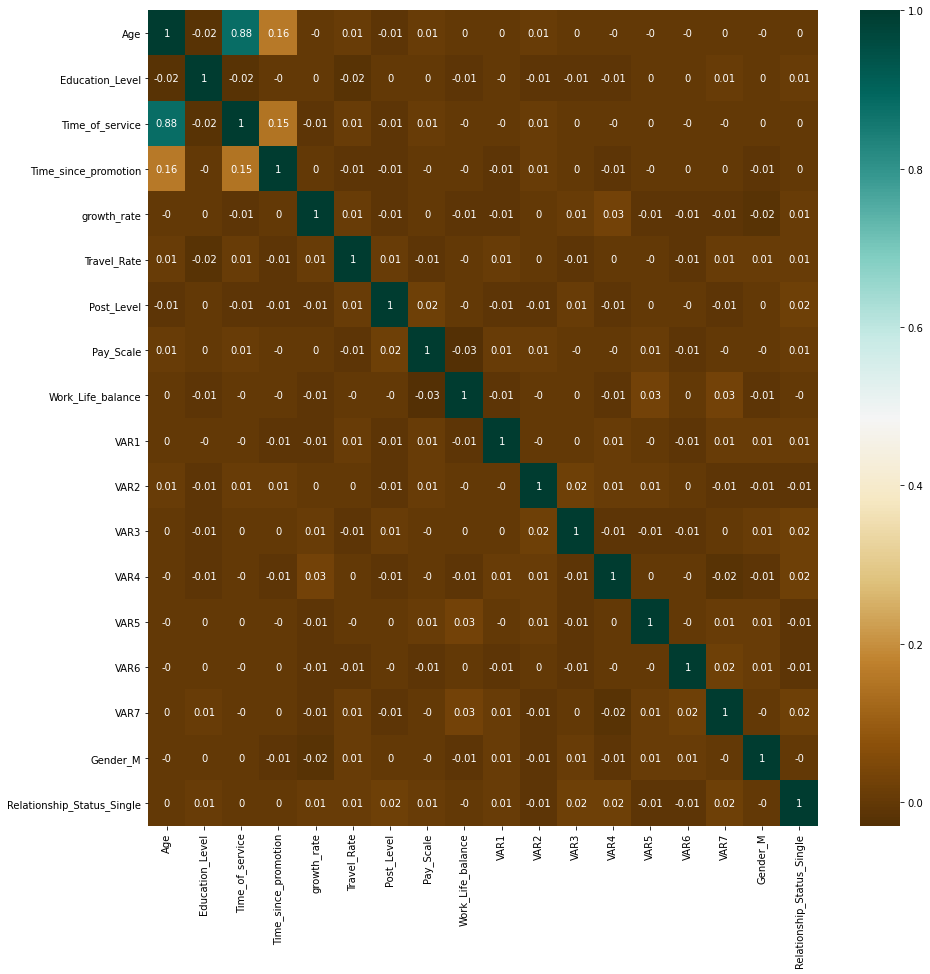

In [ ]:
#Let's plot correlation map
corr_dataset2 = dataset2.corr().round(2)

plt.figure(figsize=(15,15))
sns.heatmap(corr_dataset2,cmap="BrBG",annot=True)

In [ ]:
# Create correlation matrix
corr_matrix = dataset2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

# Drop features 
dataset2.drop(to_drop, axis=1, inplace=True)

dataset2.head()

,Employee_ID,Age,Education_Level,Hometown,Unit,Decision_skill_possess,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Gender_M,Relationship_Status_Single
0,EID_23371,42.0,4,Franklin,2,2,4,33,1,1,7.0,2,3.0,4,0.7516,1.8688,2.000000,4,5,3,0,0
1,EID_18000,24.0,3,Springfield,3,0,4,36,0,3,6.0,2,4.0,3,-0.9612,-0.4537,2.000000,3,5,3,1,1
2,EID_3891,58.0,3,Clinton,8,2,3,51,0,2,8.0,2,1.0,4,-0.9612,-0.4537,3.000000,3,8,3,0,0
3,EID_17492,26.0,3,Lebanon,1,1,3,56,1,3,8.0,2,1.0,3,-1.8176,-0.4537,1.895976,3,7,3,0,1
4,EID_22534,31.0,1,Springfield,3,2,4,62,1,3,2.0,3,3.0,1,0.7516,-0.4537,2.000000,2,8,2,0,0


In [ ]:
Employee_ID = dataset2['Employee_ID']
dataset2.drop(['Employee_ID','Hometown'],1,inplace=True)

In [ ]:
#Scaling and normalization 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

feature_set=ss.fit_transform(dataset2)

Creating Train and Validation Data

In this step we are going to create data models that are capable of predicting the Employee attrition. Inorder to create these models first we split the given Train dataset into Train and Validation datasets.

Train dataset is the one which have the features. We will train the model based on these values to validate the Validation dataset values.

Let's split the data into training and validation datasets

In [ ]:
#Spliting the dataset into training and testing sets 
df_train = (feature_set[:7000])   #Used for training the model
df_test = (feature_set[7000:])    #Used as a final file for prediction

features=df_train
print(features.shape)
print(target.shape)
print(df_test.shape)

(7000, 20)
(7000,)
(3000, 20)


In [ ]:
#Split input and output into desired splits of train and validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.20,random_state=1234)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5600, 20)
(5600,)
(1400, 20)
(1400,)


Entire dataset has been splitted into Train and Test datasets X_train and X_test respectively. 

As a first model in creating data models for predicting attrition rate values, I'm going to create a linear regression model

Linear Regression Model


In [ ]:
from sklearn import model_selection, metrics                                     # Importing model selection and metrics from sklearn
from sklearn.linear_model import LinearRegression                                # Importing LinearRegression from sklearn

lin_model = LinearRegression()
lin_model.fit(X_train,y_train)                                                   # Fitting the model on X_train and y_train

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Making the predictions 
df_train_predictions = lin_model.predict(X_test)

# Lets have a look at some of the predictions
df_train_predictions[:10]

array([0.17038757, 0.16388546, 0.18332897, 0.17332663, 0.19953601,
       0.18802592, 0.19399631, 0.18224558, 0.18766431, 0.1688869 ])

In [ ]:
print("RMSE:",(np.sqrt(metrics.mean_squared_error(y_test, df_train_predictions))))
print("Score:",(100*max(0,1-np.sqrt(metrics.mean_squared_error(y_test,df_train_predictions)))))
print(metrics.r2_score(y_test,df_train_predictions))

RMSE: 0.1805195079102008
Score: 81.94804920897992
0.005855007464454776


Let's go ahead with our last step of using the above model for predictions

Let's save our model using pickle so the next time we open the files, we can save time in running the model again and proceed with predictions

In [ ]:
#Saving the Model
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(lin_model) 
  
# Load the pickled model 
model_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
result = model_from_pickle.predict(df_test)      #np.array
print(result)

#Converting the result variable to dataframe
submission = pd.DataFrame(result)

[0.20901585 0.1964302  0.17970818 ... 0.17630644 0.15444453 0.18509391]


In [ ]:
#Final submission dataframe with Incident_ID and Multiple_Offense
submission['Employee_ID'] = (test_df['Employee_ID'])
submission = submission.rename(columns={0: 'Attrition_rate'})
submission['Attrition_rate'].value_counts()
submission.head()

,Attrition_rate,Employee_ID
0,0.209016,EID_22713
1,0.196430,EID_9658
2,0.179708,EID_22203
3,0.216563,EID_7652
4,0.196112,EID_6516


In [ ]:
submission.to_csv('results.csv', index=False, header=True)

___________________________________________